#베이스


In [1]:
from networkx.algorithms.shortest_paths.generic import *
from networkx.algorithms.shortest_paths.unweighted import *
from networkx.algorithms.shortest_paths.weighted import *
from networkx.algorithms.shortest_paths.astar import *
from networkx.algorithms.shortest_paths.dense import *

In [3]:
# 호선별로 저장한 txt 파일 불러오기 및 저장
subway_file1 = open('1호선.txt', 'r') # 'r'은 읽기모드
subway_file2 = open('2호선.txt', 'r')
subway_file3 = open('3호선.txt', 'r')
subway_file4 = open('4호선.txt', 'r')
subway_file5 = open('5호선.txt', 'r')

# 각 노선별로 list로 저장
subway_list_line1 = subway_file1.read().split(' - ')
subway_list_line2 = subway_file2.read().split(' - ')
subway_list_line3 = subway_file3.read().split(' - ')
subway_list_line4 = subway_file4.read().split(' - ')
subway_list_line5 = subway_file5.read().split(' - ')

# 노선 내에 공백 제거(list, 지하철 노선)
subway_line1 = [i.strip() for i in subway_list_line1]
subway_line2 = [i.strip() for i in subway_list_line2]
subway_line3 = [i.strip() for i in subway_list_line3]
subway_line4 = [i.strip() for i in subway_list_line4]
subway_line5 = [i.strip() for i in subway_list_line5]

# 지하철 수
subway_num1 = [i for i in range(1, len(subway_line1))]
subway_num2 = [i for i in range(1, len(subway_line2))]
subway_num3 = [i for i in range(1, len(subway_line3))]
subway_num4 = [i for i in range(1, len(subway_line4))]
subway_num5 = [i for i in range(1, len(subway_line5))]

# 나중에 출력 + 비교 쉽게하기 위해 만듦(dictionary)
subway_dict_line1 = dict(zip(subway_line1, subway_num1))
subway_dict_line2 = dict(zip(subway_line2, subway_num2))
subway_dict_line3 = dict(zip(subway_line3, subway_num3))
subway_dict_line4 = dict(zip(subway_line4, subway_num4))
subway_dict_line5 = dict(zip(subway_line5, subway_num5))

subway_dict_line1['line']=1
subway_dict_line2['line']=2
subway_dict_line3['line']=3
subway_dict_line4['line']=4
subway_dict_line5['line']=5

print(subway_dict_line1)
print(subway_dict_line2)
print(subway_dict_line3)
print(subway_dict_line4)
print(subway_dict_line5)

{'소요산': 1, '동두천': 2, '보산': 3, '동두천중앙': 4, '지행': 5, '덕정': 6, '덕계': 7, '양주': 8, '녹양': 9, '가능': 10, '의정부': 11, '회룡': 12, '망월사': 13, '도봉산': 14, '도봉': 15, '방학': 16, '창동': 17, '녹천': 18, '월계': 19, '성북': 20, '석계': 21, '신이문': 22, '외대앞': 23, '회기': 24, '청량리': 25, '제기동': 26, '신설동': 27, '동묘앞': 28, '동대문': 29, '종로5가': 30, '종로3가': 31, '종각': 32, '시청': 33, '서울역': 34, '남영': 35, '용산': 36, '노량진': 37, '대방': 38, '신길': 39, '영등포': 40, '신도림': 41, '구로': 42, '구일': 43, '개봉': 44, '오류동': 45, '온수': 46, '역곡': 47, '소사': 48, '부천': 49, '중동': 50, '송내': 51, '부개': 52, '부평': 53, '백운': 54, '동암': 55, '간석': 56, '주안': 57, '도화': 58, '제물포': 59, '도원': 60, '동인천': 61, '인천': 62, '광명': 63, '가산디지털단지': 64, '독산': 65, '금천구청': 66, '석수': 67, '관악': 68, '안양': 69, '명학': 70, '금정': 71, '군포': 72, '당정': 73, '의왕': 74, '성균관대': 75, '화서': 76, '수원': 77, '세류': 78, '병점': 79, '세마': 80, '오산대': 81, '오산': 82, '진위': 83, '송탄': 84, '서정리': 85, '지제': 86, '평택': 87, '성환': 88, '직산': 89, '두정': 90, '천안': 91, '봉명': 92, '쌍용': 93, '아산': 94, '배방': 95, '온양온천': 96, '신창': 97,

In [14]:
#Dijkstra

"""
데이크스트라 알고리즘은 프림 알고리즘과 매우 유사합니다.
탐욕 알고리즘에 기반하고 있습니다.
데이크스트라 알고리즘의 가장 중요한 특징은 그래프에 음수 가중치를 인정하지 않는다는 것입니다.

데이크스트라 알고리즘을 구현하려면 S라는 집합과 distance라는 배열이 필요합니다.
집합 S는 최단 경로가 발견된 정점 집합으로,
최단 경로를 찾고 있는 그래프 G의 정접 집합 V(G)와 같아질 때까지 커집니다.

또 어떤 정점 v를 인덱스로 하는 distance[v] 값은 출발 정점에서 집합 S에 있는 정점만 거쳐
목적지 v에 도달하는 경로 길이입니다.
점점 커지는 집합 S와 계속 변경되는 최단 경로 distance는 어딘가 낯이 익습니다.
눈치챘나요? 프림 알고리즘에서 자라나는 최소 비용 신장 트리의 정점 집합 TV와
가장 낮은 가중치를 저장해 놓은 w_list가 자연스럽게 떠오르는군요. 맞습니다.
집합과 배열 의미는 다르지만 구현이 매우 비슷해질 것임을 추측할 수 있습니다.
그것은 다음 절에서 좀 더 살펴보도록 하죠.
데이크스트라 알고리즘에서 중요한 연산은 relax입니다. 먼저 이 연산을 알아보겠습니다.

from heapq import heappush, heappop

class MinPriorityQueue:
    def __init__(self):
        self.heap = []

    def push(self, item):
        heappush(self.heap, item)

    def pop(self):
        return heappop(self.heap)

class ShortestPath:
    def __init__(self, s, distance, p):
        self.source = s
        self.distance = distance
        self.p = p

    def print_shortest_path(self, dest):
        if self.source == dest:
            print(dest, end=" ")
            return
        if sp.p[dest] != None:
            self.print_shortest_path(self.p[dest])
        else:
            print("There is no path")
            return
        print(dest, end=" ")

def dijkstra(self, s):
        distance = [self.BIG_NUMBER for _ in range(self.vertex_num)]
        p = [None for _ in range(self.vertex_num)]

        S = set()
        pq = MinPriorityQueue()
        for i in range(self.vertex_num):
            pq.push((self.BIG_NUMBER, i))

        distance[s] = 0
        pq.push((0, s))

        while len(S) < self.vertex_num:
            d, v = pq.pop()
            if distance[v] != d:
                continue

            S.add(v)

            adj_v = self.adjacent_set(v)
            for u, w_u_v in adj_v:
                if u not in S and distance[u] > distance[v]+w_u_v:
                    distance[u] = distance[v] + w_u_v
                    p[u] = v
                    pq.push((distance[u], u))

        sp = ShortestPath(s, distance, p)
        return sp

    def adjacent_set(self, v):
        adj_v = []
        for i in range(self.vertex_num):
            w = self.adj_matrix[v][i]
            if w:
                adj_v.append((i, w))
        return adj_v


"""

import networkx as nx
import time
import heapq

# 지하철 노선 데이터
lines = {
    '1': subway_line1,
    '2': subway_line2,
    '3': subway_line3,
    '4': subway_line4,
    '5': subway_line5
}

# 그래프 G 생성
G = nx.Graph()

def dijkstra(G, start, end):
    # 거리 정보를 무한대로 초기화
    distances = {vertex: float('infinity') for vertex in G.nodes}
    # 시작 노드의 거리는 0
    distances[start] = 0

    # 우선순위 큐 초기화
    priority_queue = [(0, start)]
    path = {}

    while priority_queue:
        # 현재 노드와 거리 가져오기
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # 이미 처리된 노드는 무시
        if current_distance > distances[current_vertex]:
            continue

        # 이웃한 노드 처리
        for neighbor, weight in G[current_vertex].items():
            distance = current_distance + weight['weight']

            # 더 짧은 경로를 찾은 경우 업데이트
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                path[neighbor] = current_vertex

    # 최단 경로 재구성
    shortest_path = []
    current_node = end
    while current_node != start:
        shortest_path.append(current_node)
        current_node = path[current_node]
    shortest_path.append(start)
    shortest_path.reverse()

    return shortest_path, distances[end]

# 역들 사이의 연결 추가(소요시간 = 2 min)
for line, stations in lines.items():
    for i in range(len(stations)-1):
        G.add_edge((line, stations[i]), (line, stations[i+1]), weight=2)

# 환승 역 찾기
transfer_stations = {}
for line, stations in lines.items():
    for station in stations:
        if station not in transfer_stations:
            transfer_stations[station] = []
        transfer_stations[station].append(line)

# 환승 역에 환승 시간 추가 (환승시간 = 2 min)
for station, lines in transfer_stations.items():
    if len(lines) > 1:
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                G.add_edge((lines[i], station), (lines[j], station), weight=10)

# 최단 경로에서 환승 정보 포함하여 출력
def print_path_with_transfers(path):
    # 경로를 출력하기 위한 문자열 초기화
    path_str = ""
    transfer_info = []

    # 경로를 순회하며 환승 여부 확인
    for i in range(len(path) - 1):
        current_station, next_station = path[i], path[i+1]
        current_line, next_line = current_station[0], next_station[0]

        # 노선이 바뀌는 지점(환승) 확인
        if current_line != next_line:
            transfer_info.append((current_line, next_line, current_station[1]))

        # 경로 문자열에 현재 역 추가
        path_str += f"({current_station[0]},{current_station[1]}) -> "

    # 마지막 역 추가
    path_str += f"({path[-1][0]},{path[-1][1]})"

    # 경로 출력
    print("최단 경로:", path_str)

    # 환승 정보 출력
    for transfer in transfer_info:
        print(f"환승 정보: {transfer[2]}에서 {transfer[0]}호선에서 {transfer[1]}호선으로 환승하기")

# Dijkstra 알고리즘으로 최단 경로 찾기
start_station = ('1', '시청')
end_station = ('5', '동대문역사문화공원')

#시작시간 측정
start_time = time.time()

shortest_path, shortest_path_length = dijkstra(G, start_station, end_station)
print_path_with_transfers(shortest_path)
#종료시간 측정
end_time = time.time()

#총 실행 시간:
execution_time = end_time - start_time

print("이동 시간:",shortest_path_length,"분")
print("실행 시간: {:.4f}초".format(execution_time))

최단 경로: (1,시청) -> (1,종각) -> (1,종로3가) -> (5,종로3가) -> (5,을지로4가) -> (5,동대문역사문화공원)
환승 정보: 종로3가에서 1호선에서 5호선으로 환승하기
이동 시간: 18 분
실행 시간: 0.0025초


In [15]:
import networkx as nx
import time
import heapq

# 지하철 노선 데이터
lines = {
    '1': subway_line1,
    '2': subway_line2,
    '3': subway_line3,
    '4': subway_line4,
    '5': subway_line5
}

# 그래프 G 생성
G = nx.Graph()

def dijkstra(G, start, end):
    # 거리 정보를 무한대로 초기화
    distances = {vertex: float('infinity') for vertex in G.nodes}
    # 시작 노드의 거리는 0
    distances[start] = 0

    # 우선순위 큐 초기화
    priority_queue = [(0, start)]
    path = {}

    while priority_queue:
        # 현재 노드와 거리 가져오기
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # 이미 처리된 노드는 무시
        if current_distance > distances[current_vertex]:
            continue

        # 이웃한 노드 처리
        for neighbor, weight in G[current_vertex].items():
            distance = current_distance + weight['weight']

            # 더 짧은 경로를 찾은 경우 업데이트
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                path[neighbor] = current_vertex

    # 최단 경로 재구성
    shortest_path = []
    current_node = end
    while current_node != start:
        shortest_path.append(current_node)
        current_node = path[current_node]
    shortest_path.append(start)
    shortest_path.reverse()

    return shortest_path, distances[end]

# 최소 환승 경로 찾기를 위한 다익스트라 알고리즘
def dijkstra_with_min_transfers(G, start, end):
    distances = {vertex: float('infinity') for vertex in G.nodes}
    transfers = {vertex: float('infinity') for vertex in G.nodes}  # 환승 횟수 저장을 위한 딕셔너리
    distances[start] = 0
    transfers[start] = 0  # 시작점의 환승 횟수는 0

    priority_queue = [(0, 0, start)]  # (거리, 환승 횟수, 정점)
    path = {}

    while priority_queue:
        current_distance, current_transfers, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in G[current_vertex].items():
            distance = current_distance + weight['weight']
            transfer = current_transfers + (1 if current_vertex[0] != neighbor[0] else 0)  # 환승 시 환승 횟수 추가

            if transfer < transfers[neighbor] or (transfer == transfers[neighbor] and distance < distances[neighbor]):
                distances[neighbor] = distance
                transfers[neighbor] = transfer
                heapq.heappush(priority_queue, (distance, transfer, neighbor))
                path[neighbor] = current_vertex

    shortest_path = []
    current_node = end
    while current_node != start:
        shortest_path.append(current_node)
        current_node = path.get(current_node, start)  # 경로가 없으면 시작점으로 설정하여 루프 종료
    shortest_path.append(start)
    shortest_path.reverse()

    return shortest_path, distances[end], transfers[end]

# 역들 사이의 연결 추가(소요시간 = 2 min)
for line, stations in lines.items():
    for i in range(len(stations)-1):
        G.add_edge((line, stations[i]), (line, stations[i+1]), weight=2)

# 환승 역 찾기
transfer_stations = {}
for line, stations in lines.items():
    for station in stations:
        if station not in transfer_stations:
            transfer_stations[station] = []
        transfer_stations[station].append(line)

# 환승 역에 환승 시간 추가 (환승시간 = 2 min)
for station, lines in transfer_stations.items():
    if len(lines) > 1:
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                G.add_edge((lines[i], station), (lines[j], station), weight=10)

# 최단 경로에서 환승 정보 포함하여 출력
def print_path_with_transfers(path):
    # 경로를 출력하기 위한 문자열 초기화
    path_str = ""
    transfer_info = []

    # 경로를 순회하며 환승 여부 확인
    for i in range(len(path) - 1):
        current_station, next_station = path[i], path[i+1]
        current_line, next_line = current_station[0], next_station[0]

        # 노선이 바뀌는 지점(환승) 확인
        if current_line != next_line:
            transfer_info.append((current_line, next_line, current_station[1]))

        # 경로 문자열에 현재 역 추가
        path_str += f"({current_station[0]},{current_station[1]}) -> "

    # 마지막 역 추가
    path_str += f"({path[-1][0]},{path[-1][1]})"

    # 경로 출력
    print("최단 경로:", path_str)

    # 환승 정보 출력
    for transfer in transfer_info:
        print(f"환승 정보: {transfer[2]}에서 {transfer[0]}호선에서 {transfer[1]}호선으로 환승하기")

# Dijkstra 알고리즘으로 최단 경로 찾기
start_station = ('1', '시청')
end_station = ('5', '동대문역사문화공원')

#시작시간 측정
start_time = time.time()

shortest_path, shortest_path_length, transfer_count = dijkstra_with_min_transfers(G, start_station, end_station)

print_path_with_transfers(shortest_path)
#종료시간 측정
end_time = time.time()

#총 실행 시간:
execution_time = end_time - start_time

print("이동 시간:",shortest_path_length,"분")
print("환승 횟수:", transfer_count)
print("실행 시간: {:.4f}초".format(execution_time))

최단 경로: (1,시청) -> (1,종각) -> (1,종로3가) -> (5,종로3가) -> (5,을지로4가) -> (5,동대문역사문화공원)
환승 정보: 종로3가에서 1호선에서 5호선으로 환승하기
이동 시간: 18 분
환승 횟수: 1
실행 시간: 0.0041초


최단 경로: (1,시청) -> (1,서울역) -> (4,서울역) -> (4,숙대입구) -> (4,삼각지) -> (4,신용산) -> (4,이촌) -> (4,동작) -> (4,이수) -> (4,사당) -> (4,남태령) -> (4,선바위) -> (4,경마공원) -> (4,대공원) -> (4,과천) -> (4,정부과천청사) -> (4,인덕원) -> (4,평촌) -> (4,범계) -> (4,금정) -> (4,산본)
환승 정보: 서울역에서 1호선에서 4호선으로 환승하기
이동 시간: 40 분
실행 시간: 0.0014초


<ipython-input-16-6b555518da57>:54: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.draw()
<ipython-input-16-6b555518da57>:54: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  plt.draw()
<ipython-input-16-6b555518da57>:54: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  plt.draw()
<ipython-input-16-6b555518da57>:54: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.draw()
<ipython-input-16-6b555518da57>:54: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.draw()
<ipython-input-16-6b555518da57>:54: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  plt.draw()
<ipython-input-16-6b555518da57>:54: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  plt.draw()
<ipython-input-16-6b555518da57>:54: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font

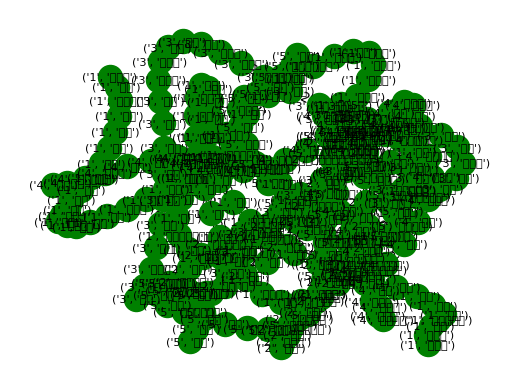

In [16]:
#시각화 코드

"""
# 호선별 색상 지정
line_colors = {
    '1': 'blue',    # 파랑색
    '2': 'green',   # 초록색
    '3': 'orange',  # 주황색
    '4': 'skyblue', # 하늘색
    '5': 'purple'   # 보라색
}"""
import networkx as nx
import matplotlib.pyplot as plt
import time
import heapq

lines = {
    '1': subway_line1,
    '2': subway_line2,
    '3': subway_line3,
    '4': subway_line4,
    '5': subway_line5
}

# 그래프 G 생성
G = nx.Graph()

# 역들 사이의 연결 추가(소요시간 = 2 min)
for line, stations in lines.items():
    for i in range(len(stations) - 1):
        G.add_edge((line, stations[i]), (line, stations[i+1]), weight=2)

# 환승 역 찾기
transfer_stations = {}
for line, stations in lines.items():
    for station in stations:
        if station not in transfer_stations:
            transfer_stations[station] = []
        transfer_stations[station].append(line)

# 환승 역에 환승 시간 추가 (환승시간 = 2 min)
for station, lines in transfer_stations.items():
    if len(lines) > 1:
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                G.add_edge((lines[i], station), (lines[j], station), weight=2)

def graph_visualizer(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_color="g", font_size=8)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.axis('off')
    plt.draw()
    plt.savefig("/content/metro.png")

def dijkstra(G, start, end):
    distances = {vertex: float('infinity') for vertex in G.nodes}
    distances[start] = 0
    priority_queue = [(0, start)]
    path = {}

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in G[current_vertex].items():
            distance = current_distance + weight['weight']

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                path[neighbor] = current_vertex

    shortest_path = []
    current_node = end
    while current_node != start:
        shortest_path.append(current_node)
        current_node = path[current_node]
    shortest_path.append(start)
    shortest_path.reverse()

    return shortest_path, distances[end]

def print_path_with_transfers(path):
    path_str = ""
    transfer_info = []
    for i in range(len(path) - 1):
        current_station, next_station = path[i], path[i+1]
        current_line, next_line = current_station[0], next_station[0]

        if current_line != next_line:
            transfer_info.append((current_line, next_line, current_station[1]))
        path_str += f"({current_station[0]},{current_station[1]}) -> "
    path_str += f"({path[-1][0]},{path[-1][1]})"
    print("최단 경로:", path_str)
    for transfer in transfer_info:
        print(f"환승 정보: {transfer[2]}에서 {transfer[0]}호선에서 {transfer[1]}호선으로 환승하기")

start_station = ('1', '시청')
end_station = ('4', '산본')
start_time = time.time()
shortest_path, shortest_path_length = dijkstra(G, start_station, end_station)
print_path_with_transfers(shortest_path)
end_time = time.time()
execution_time = end_time - start_time
print("이동 시간:", shortest_path_length, "분")
print("실행 시간: {:.4f}초".format(execution_time))

# 그래프 시각화 호출
graph_visualizer(G)

In [ ]:
#DFS
import networkx as nx

lines = {
    '1': subway_line1,
    '2': subway_line2,
    '3': subway_line3,
    '4': subway_line4,
    '5': subway_line5
}

# 그래프 G 생성
G = nx.Graph()

# 역들 사이의 연결 추가(소요시간 = 2min)
for line, stations in lines.items():
    for i in range(len(stations)-1):
        G.add_edge((line, stations[i]), (line, stations[i+1]), weight=2)

# 환승 역 찾기
transfer_stations = {}
for line, stations in lines.items():
    for station in stations:
        if station not in transfer_stations:
            transfer_stations[station] = []
        transfer_stations[station].append(line)

# 환승 역에 환승 시간 추가 (환승시간 = 2min)
for station, lines in transfer_stations.items():
    if len(lines) > 1:
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                G.add_edge((lines[i], station), (lines[j], station), weight=2)

# DFS를 사용하여 모든 경로 탐색
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in set(graph.neighbors(vertex)) - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

# '안양'에서 '거여'까지의 모든 경로 찾기
start_station = ('5', '화곡')
end_station = ('1', '구로')
all_paths = list(dfs_paths(G, start_station, end_station))

# 모든 경로 중에서 가장 짧은 경로 찾기
shortest_path = min(all_paths, key=lambda path: sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:])))
shortest_path_length = sum(G[u][v]['weight'] for u, v in zip(shortest_path[:-1], shortest_path[1:]))

print("최단 경로:", shortest_path)
print("이동 시간:", shortest_path_length)

최단 경로: [('5', '화곡'), ('5', '까치산'), ('5', '신정'), ('5', '목동'), ('5', '오목교'), ('5', '양평'), ('5', '영등포구청'), ('2', '영등포구청'), ('2', '문래'), ('2', '신도림'), ('1', '신도림'), ('1', '구로')]
이동 시간: 22


In [ ]:
import networkx as nx
import time
import heapq

def dijkstra(G, start, end):
    # 거리 정보를 무한대로 초기화
    distances = {vertex: float('infinity') for vertex in G.nodes}
    # 시작 노드의 거리는 0
    distances[start] = 0

    # 우선순위 큐 초기화
    priority_queue = [(0, start)]
    path = {}

    while priority_queue:
        # 현재 노드와 거리 가져오기
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # 이미 처리된 노드는 무시
        if current_distance > distances[current_vertex]:
            continue

        # 이웃한 노드 처리
        for neighbor, weight in G[current_vertex].items():
            distance = current_distance + weight['weight']

            # 더 짧은 경로를 찾은 경우 업데이트
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                path[neighbor] = current_vertex

    # 최단 경로 재구성
    shortest_path = []
    current_node = end
    while current_node != start:
        shortest_path.append(current_node)
        current_node = path[current_node]
    shortest_path.append(start)
    shortest_path.reverse()

    return shortest_path, distances[end]

# 나머지 부분은 동일하게 유지
# ...

start_time = time.time()

# dijkstra 함수 사용
shortest_path, shortest_path_length = dijkstra(G, start_station, end_station)
print_path_with_transfers(shortest_path)
end_time = time.time()

execution_time = end_time - start_time

print("이동 시간:", shortest_path_length, "분")
print("실행 시간: {:.4f}초".format(execution_time))


최단 경로: (1,서울역) -> (1,시청) -> (2,시청)
환승 정보: 시청역에서 1호선에서 2호선으로 환승하기
이동 시간: 4 분
실행 시간: 0.0015초


최단 경로: (1,소요산) -> (1,동두천) -> (1,보산) -> (1,동두천중앙) -> (1,지행) -> (1,덕정) -> (1,덕계) -> (1,양주) -> (1,녹양) -> (1,가능) -> (1,의정부) -> (1,회룡) -> (1,망월사) -> (1,도봉산) -> (1,도봉) -> (1,방학) -> (1,창동) -> (4,창동) -> (4,노원) -> (4,상계) -> (4,당고개)
환승 정보: 창동에서 1호선에서 4호선으로 환승하기
이동 시간: 40 분
실행 시간: {:.4f}초


<ipython-input-20-8785771174b2>:52: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.draw()
<ipython-input-20-8785771174b2>:52: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  plt.draw()
<ipython-input-20-8785771174b2>:52: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  plt.draw()
<ipython-input-20-8785771174b2>:52: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.draw()
<ipython-input-20-8785771174b2>:52: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.draw()
<ipython-input-20-8785771174b2>:52: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  plt.draw()
<ipython-input-20-8785771174b2>:52: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  plt.draw()
<ipython-input-20-8785771174b2>:52: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font

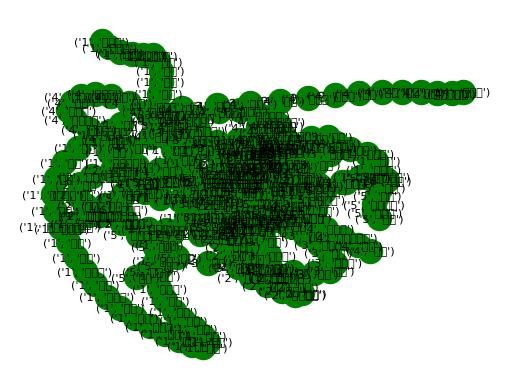

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import heapq

# 노선별 색상 지정
line_colors = {
    '1': 'blue',    # 파랑색
    '2': 'green',   # 초록색
    '3': 'orange',  # 주황색
    '4': 'skyblue', # 하늘색
    '5': 'purple'   # 보라색
}

lines = {
    '1': subway_line1,
    '2': subway_line2,
    '3': subway_line3,
    '4': subway_line4,
    '5': subway_line5
}

# 그래프 G 생성
G = nx.Graph()

# 역들 사이의 연결 추가(소요시간 = 2 min)
for line, stations in lines.items():
    for i in range(len(stations) - 1):
        G.add_edge((line, stations[i]), (line, stations[i+1]), weight=2)

# 환승 역 찾기
transfer_stations = {}
for line, stations in lines.items():
    for station in stations:
        if station not in transfer_stations:
            transfer_stations[station] = []
        transfer_stations[station].append(line)

# 환승 역에 환승 시간 추가 (환승시간 = 2 min)
for station, line_list in transfer_stations.items():
    if len(line_list) > 1:
        for i in range(len(line_list)):
            for j in range(i + 1, len(line_list)):
                G.add_edge((line_list[i], station), (line_list[j], station), weight=2)

def graph_visualizer(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_color="g", font_size=8)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.axis('off')
    plt.draw()
    plt.savefig("/content/metro.png")

def dijkstra(G, start, end):
    distances = {vertex: float('infinity') for vertex in G.nodes}
    distances[start] = 0
    priority_queue = [(0, start)]
    path = {}

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in G[current_vertex].items():
            distance = current_distance + weight['weight']

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                path[neighbor] = current_vertex

    shortest_path = []
    current_node = end
    while current_node != start:
        shortest_path.append(current_node)
        current_node = path[current_node]
    shortest_path.append(start)
    shortest_path.reverse()

    return shortest_path, distances[end]

def print_path_with_transfers(path):
    path_str = ""
    transfer_info = []
    for i in range(len(path) - 1):
        current_station, next_station = path[i], path[i+1]
        current_line, next_line = current_station[0], next_station[0]

        if current_line != next_line:
            transfer_info.append((current_line, next_line, current_station[1]))
        path_str += f"({current_station[0]},{current_station[1]}) -> "
    path_str += f"({path[-1][0]},{path[-1][1]})"
    print("최단 경로:", path_str)
    for transfer in transfer_info:
        print(f"환승 정보: {transfer[2]}에서 {transfer[0]}호선에서 {transfer[1]}호선으로 환승하기")

start_station = ('1', '소요산')
end_station = ('4', '당고개')
start_time = time.time()
shortest_path, shortest_path_length = dijkstra(G, start_station, end_station)
print_path_with_transfers(shortest_path)
end_time = time.time()
execution_time = end_time - start_time
print("이동 시간:", shortest_path_length, "분")
print("실행 시간: {:.4f}초")
# 그래프 시각화 호출
graph_visualizer(G)

# networkx

A star

In [ ]:
"""Shortest paths and path lengths using the A* ("A star") algorithm.
"""
from heapq import heappop, heappush
from itertools import count

import networkx as nx
from networkx.algorithms.shortest_paths.weighted import _weight_function

__all__ = ["astar_path", "astar_path_length"]


@nx._dispatchable(edge_attrs="weight", preserve_node_attrs="heuristic")
def astar_path(G, source, target, heuristic=None, weight="weight", *, cutoff=None):
    """Returns a list of nodes in a shortest path between source and target
    using the A* ("A-star") algorithm.

    There may be more than one shortest path.  This returns only one.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path

    target : node
       Ending node for path

    heuristic : function
       A function to evaluate the estimate of the distance
       from the a node to the target.  The function takes
       two nodes arguments and must return a number.
       If the heuristic is inadmissible (if it might
       overestimate the cost of reaching the goal from a node),
       the result may not be a shortest path.
       The algorithm does not support updating heuristic
       values for the same node due to caching the first
       heuristic calculation per node.

    weight : string or function
       If this is a string, then edge weights will be accessed via the
       edge attribute with this key (that is, the weight of the edge
       joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
       such edge attribute exists, the weight of the edge is assumed to
       be one.
       If this is a function, the weight of an edge is the value
       returned by the function. The function must accept exactly three
       positional arguments: the two endpoints of an edge and the
       dictionary of edge attributes for that edge. The function must
       return a number or None to indicate a hidden edge.

    cutoff : float, optional
       If this is provided, the search will be bounded to this value. I.e. if
       the evaluation function surpasses this value for a node n, the node will not
       be expanded further and will be ignored. More formally, let h'(n) be the
       heuristic function, and g(n) be the cost of reaching n from the source node. Then,
       if g(n) + h'(n) > cutoff, the node will not be explored further.
       Note that if the heuristic is inadmissible, it is possible that paths
       are ignored even though they satisfy the cutoff.

    Raises
    ------
    NetworkXNoPath
        If no path exists between source and target.

    Examples
    --------
    >>> G = nx.path_graph(5)
    >>> print(nx.astar_path(G, 0, 4))
    [0, 1, 2, 3, 4]
    >>> G = nx.grid_graph(dim=[3, 3])  # nodes are two-tuples (x,y)
    >>> nx.set_edge_attributes(G, {e: e[1][0] * 2 for e in G.edges()}, "cost")
    >>> def dist(a, b):
    ...     (x1, y1) = a
    ...     (x2, y2) = b
    ...     return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    >>> print(nx.astar_path(G, (0, 0), (2, 2), heuristic=dist, weight="cost"))
    [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]

    Notes
    -----
    Edge weight attributes must be numerical.
    Distances are calculated as sums of weighted edges traversed.

    The weight function can be used to hide edges by returning None.
    So ``weight = lambda u, v, d: 1 if d['color']=="red" else None``
    will find the shortest red path.

    See Also
    --------
    shortest_path, dijkstra_path

    """
    if source not in G or target not in G:
        msg = f"Either source {source} or target {target} is not in G"
        raise nx.NodeNotFound(msg)

    if heuristic is None:
        # The default heuristic is h=0 - same as Dijkstra's algorithm
        def heuristic(u, v):
            return 0

    push = heappush
    pop = heappop
    weight = _weight_function(G, weight)

    G_succ = G._adj  # For speed-up (and works for both directed and undirected graphs)

    # The queue stores priority, node, cost to reach, and parent.
    # Uses Python heapq to keep in priority order.
    # Add a counter to the queue to prevent the underlying heap from
    # attempting to compare the nodes themselves. The hash breaks ties in the
    # priority and is guaranteed unique for all nodes in the graph.
    c = count()
    queue = [(0, next(c), source, 0, None)]

    # Maps enqueued nodes to distance of discovered paths and the
    # computed heuristics to target. We avoid computing the heuristics
    # more than once and inserting the node into the queue too many times.
    enqueued = {}
    # Maps explored nodes to parent closest to the source.
    explored = {}

    while queue:
        # Pop the smallest item from queue.
        _, __, curnode, dist, parent = pop(queue)

        if curnode == target:
            path = [curnode]
            node = parent
            while node is not None:
                path.append(node)
                node = explored[node]
            path.reverse()
            return path

        if curnode in explored:
            # Do not override the parent of starting node
            if explored[curnode] is None:
                continue

            # Skip bad paths that were enqueued before finding a better one
            qcost, h = enqueued[curnode]
            if qcost < dist:
                continue

        explored[curnode] = parent

        for neighbor, w in G_succ[curnode].items():
            cost = weight(curnode, neighbor, w)
            if cost is None:
                continue
            ncost = dist + cost
            if neighbor in enqueued:
                qcost, h = enqueued[neighbor]
                # if qcost <= ncost, a less costly path from the
                # neighbor to the source was already determined.
                # Therefore, we won't attempt to push this neighbor
                # to the queue
                if qcost <= ncost:
                    continue
            else:
                h = heuristic(neighbor, target)

            if cutoff and ncost + h > cutoff:
                continue

            enqueued[neighbor] = ncost, h
            push(queue, (ncost + h, next(c), neighbor, ncost, curnode))

    raise nx.NetworkXNoPath(f"Node {target} not reachable from {source}")


@nx._dispatchable(edge_attrs="weight", preserve_node_attrs="heuristic")
def astar_path_length(
    G, source, target, heuristic=None, weight="weight", *, cutoff=None
):
    """Returns the length of the shortest path between source and target using
    the A* ("A-star") algorithm.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path

    target : node
       Ending node for path

    heuristic : function
       A function to evaluate the estimate of the distance
       from the a node to the target.  The function takes
       two nodes arguments and must return a number.
       If the heuristic is inadmissible (if it might
       overestimate the cost of reaching the goal from a node),
       the result may not be a shortest path.
       The algorithm does not support updating heuristic
       values for the same node due to caching the first
       heuristic calculation per node.

    weight : string or function
       If this is a string, then edge weights will be accessed via the
       edge attribute with this key (that is, the weight of the edge
       joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
       such edge attribute exists, the weight of the edge is assumed to
       be one.
       If this is a function, the weight of an edge is the value
       returned by the function. The function must accept exactly three
       positional arguments: the two endpoints of an edge and the
       dictionary of edge attributes for that edge. The function must
       return a number or None to indicate a hidden edge.

    cutoff : float, optional
       If this is provided, the search will be bounded to this value. I.e. if
       the evaluation function surpasses this value for a node n, the node will not
       be expanded further and will be ignored. More formally, let h'(n) be the
       heuristic function, and g(n) be the cost of reaching n from the source node. Then,
       if g(n) + h'(n) > cutoff, the node will not be explored further.
       Note that if the heuristic is inadmissible, it is possible that paths
       are ignored even though they satisfy the cutoff.

    Raises
    ------
    NetworkXNoPath
        If no path exists between source and target.

    See Also
    --------
    astar_path

    """
    if source not in G or target not in G:
        msg = f"Either source {source} or target {target} is not in G"
        raise nx.NodeNotFound(msg)

    weight = _weight_function(G, weight)
    path = astar_path(G, source, target, heuristic, weight, cutoff=cutoff)
    return sum(weight(u, v, G[u][v]) for u, v in zip(path[:-1], path[1:]))

Dijkstra 알고리즘


In [ ]:
"""
Shortest path algorithms for weighted graphs.
"""

from collections import deque
from heapq import heappop, heappush
from itertools import count

import networkx as nx
from networkx.algorithms.shortest_paths.generic import _build_paths_from_predecessors

__all__ = [
    "dijkstra_path",
    "dijkstra_path_length",
    "bidirectional_dijkstra",
    "single_source_dijkstra",
    "single_source_dijkstra_path",
    "single_source_dijkstra_path_length",
    "multi_source_dijkstra",
    "multi_source_dijkstra_path",
    "multi_source_dijkstra_path_length",
    "all_pairs_dijkstra",
    "all_pairs_dijkstra_path",
    "all_pairs_dijkstra_path_length",
    "dijkstra_predecessor_and_distance",
    "bellman_ford_path",
    "bellman_ford_path_length",
    "single_source_bellman_ford",
    "single_source_bellman_ford_path",
    "single_source_bellman_ford_path_length",
    "all_pairs_bellman_ford_path",
    "all_pairs_bellman_ford_path_length",
    "bellman_ford_predecessor_and_distance",
    "negative_edge_cycle",
    "find_negative_cycle",
    "goldberg_radzik",
    "johnson",
]


def _weight_function(G, weight):

    if callable(weight):
        return weight
    # If the weight keyword argument is not callable, we assume it is a
    # string representing the edge attribute containing the weight of
    # the edge.
    if G.is_multigraph():
        return lambda u, v, d: min(attr.get(weight, 1) for attr in d.values())
    return lambda u, v, data: data.get(weight, 1)


@nx._dispatchable(edge_attrs="weight")
def dijkstra_path(G, source, target, weight="weight"):

    (length, path) = single_source_dijkstra(G, source, target=target, weight=weight)
    return path


@nx._dispatchable(edge_attrs="weight")
def dijkstra_path_length(G, source, target, weight="weight"):

    if source not in G:
        raise nx.NodeNotFound(f"Node {source} not found in graph")
    if source == target:
        return 0
    weight = _weight_function(G, weight)
    length = _dijkstra(G, source, weight, target=target)
    try:
        return length[target]
    except KeyError as err:
        raise nx.NetworkXNoPath(f"Node {target} not reachable from {source}") from err


@nx._dispatchable(edge_attrs="weight")
def single_source_dijkstra_path(G, source, cutoff=None, weight="weight"):

    return multi_source_dijkstra_path(G, {source}, cutoff=cutoff, weight=weight)


@nx._dispatchable(edge_attrs="weight")
def single_source_dijkstra_path_length(G, source, cutoff=None, weight="weight"):

    return multi_source_dijkstra_path_length(G, {source}, cutoff=cutoff, weight=weight)


@nx._dispatchable(edge_attrs="weight")
def single_source_dijkstra(G, source, target=None, cutoff=None, weight="weight"):

    return multi_source_dijkstra(
        G, {source}, cutoff=cutoff, target=target, weight=weight
    )


@nx._dispatchable(edge_attrs="weight")
def multi_source_dijkstra_path(G, sources, cutoff=None, weight="weight"):

    length, path = multi_source_dijkstra(G, sources, cutoff=cutoff, weight=weight)
    return path


@nx._dispatchable(edge_attrs="weight")
def multi_source_dijkstra_path_length(G, sources, cutoff=None, weight="weight"):

    if not sources:
        raise ValueError("sources must not be empty")
    for s in sources:
        if s not in G:
            raise nx.NodeNotFound(f"Node {s} not found in graph")
    weight = _weight_function(G, weight)
    return _dijkstra_multisource(G, sources, weight, cutoff=cutoff)


@nx._dispatchable(edge_attrs="weight")
def multi_source_dijkstra(G, sources, target=None, cutoff=None, weight="weight"):

    if not sources:
        raise ValueError("sources must not be empty")
    for s in sources:
        if s not in G:
            raise nx.NodeNotFound(f"Node {s} not found in graph")
    if target in sources:
        return (0, [target])
    weight = _weight_function(G, weight)
    paths = {source: [source] for source in sources}  # dictionary of paths
    dist = _dijkstra_multisource(
        G, sources, weight, paths=paths, cutoff=cutoff, target=target
    )
    if target is None:
        return (dist, paths)
    try:
        return (dist[target], paths[target])
    except KeyError as err:
        raise nx.NetworkXNoPath(f"No path to {target}.") from err


def _dijkstra(G, source, weight, pred=None, paths=None, cutoff=None, target=None):

    return _dijkstra_multisource(
        G, [source], weight, pred=pred, paths=paths, cutoff=cutoff, target=target
    )


def _dijkstra_multisource(
    G, sources, weight, pred=None, paths=None, cutoff=None, target=None
):

    G_succ = G._adj  # For speed-up (and works for both directed and undirected graphs)

    push = heappush
    pop = heappop
    dist = {}  # dictionary of final distances
    seen = {}
    # fringe is heapq with 3-tuples (distance,c,node)
    # use the count c to avoid comparing nodes (may not be able to)
    c = count()
    fringe = []
    for source in sources:
        seen[source] = 0
        push(fringe, (0, next(c), source))
    while fringe:
        (d, _, v) = pop(fringe)
        if v in dist:
            continue  # already searched this node.
        dist[v] = d
        if v == target:
            break
        for u, e in G_succ[v].items():
            cost = weight(v, u, e)
            if cost is None:
                continue
            vu_dist = dist[v] + cost
            if cutoff is not None:
                if vu_dist > cutoff:
                    continue
            if u in dist:
                u_dist = dist[u]
                if vu_dist < u_dist:
                    raise ValueError("Contradictory paths found:", "negative weights?")
                elif pred is not None and vu_dist == u_dist:
                    pred[u].append(v)
            elif u not in seen or vu_dist < seen[u]:
                seen[u] = vu_dist
                push(fringe, (vu_dist, next(c), u))
                if paths is not None:
                    paths[u] = paths[v] + [u]
                if pred is not None:
                    pred[u] = [v]
            elif vu_dist == seen[u]:
                if pred is not None:
                    pred[u].append(v)

    # The optional predecessor and path dictionaries can be accessed
    # by the caller via the pred and paths objects passed as arguments.
    return dist


@nx._dispatchable(edge_attrs="weight")
def dijkstra_predecessor_and_distance(G, source, cutoff=None, weight="weight"):

    if source not in G:
        raise nx.NodeNotFound(f"Node {source} is not found in the graph")
    weight = _weight_function(G, weight)
    pred = {source: []}  # dictionary of predecessors
    return (pred, _dijkstra(G, source, weight, pred=pred, cutoff=cutoff))


@nx._dispatchable(edge_attrs="weight")
def all_pairs_dijkstra(G, cutoff=None, weight="weight"):

    for n in G:
        dist, path = single_source_dijkstra(G, n, cutoff=cutoff, weight=weight)
        yield (n, (dist, path))


@nx._dispatchable(edge_attrs="weight")
def all_pairs_dijkstra_path_length(G, cutoff=None, weight="weight"):

    length = single_source_dijkstra_path_length
    for n in G:
        yield (n, length(G, n, cutoff=cutoff, weight=weight))


@nx._dispatchable(edge_attrs="weight")
def all_pairs_dijkstra_path(G, cutoff=None, weight="weight"):

    path = single_source_dijkstra_path
    # TODO This can be trivially parallelized.
    for n in G:
        yield (n, path(G, n, cutoff=cutoff, weight=weight))


@nx._dispatchable(edge_attrs="weight")
def bellman_ford_predecessor_and_distance(
    G, source, target=None, weight="weight", heuristic=False
):

    if source not in G:
        raise nx.NodeNotFound(f"Node {source} is not found in the graph")
    weight = _weight_function(G, weight)
    if G.is_multigraph():
        if any(
            weight(u, v, {k: d}) < 0
            for u, v, k, d in nx.selfloop_edges(G, keys=True, data=True)
        ):
            raise nx.NetworkXUnbounded("Negative cycle detected.")
    else:
        if any(weight(u, v, d) < 0 for u, v, d in nx.selfloop_edges(G, data=True)):
            raise nx.NetworkXUnbounded("Negative cycle detected.")

    dist = {source: 0}
    pred = {source: []}

    if len(G) == 1:
        return pred, dist

    weight = _weight_function(G, weight)

    dist = _bellman_ford(
        G, [source], weight, pred=pred, dist=dist, target=target, heuristic=heuristic
    )
    return (pred, dist)


def _bellman_ford(
    G,
    source,
    weight,
    pred=None,
    paths=None,
    dist=None,
    target=None,
    heuristic=True,
):

    if pred is None:
        pred = {v: [] for v in source}

    if dist is None:
        dist = {v: 0 for v in source}

    negative_cycle_found = _inner_bellman_ford(
        G,
        source,
        weight,
        pred,
        dist,
        heuristic,
    )
    if negative_cycle_found is not None:
        raise nx.NetworkXUnbounded("Negative cycle detected.")

    if paths is not None:
        sources = set(source)
        dsts = [target] if target is not None else pred
        for dst in dsts:
            gen = _build_paths_from_predecessors(sources, dst, pred)
            paths[dst] = next(gen)

    return dist


def _inner_bellman_ford(
    G,
    sources,
    weight,
    pred,
    dist=None,
    heuristic=True,
):

    for s in sources:
        if s not in G:
            raise nx.NodeNotFound(f"Source {s} not in G")

    if pred is None:
        pred = {v: [] for v in sources}

    if dist is None:
        dist = {v: 0 for v in sources}

    # Heuristic Storage setup. Note: use None because nodes cannot be None
    nonexistent_edge = (None, None)
    pred_edge = {v: None for v in sources}
    recent_update = {v: nonexistent_edge for v in sources}

    G_succ = G._adj  # For speed-up (and works for both directed and undirected graphs)
    inf = float("inf")
    n = len(G)

    count = {}
    q = deque(sources)
    in_q = set(sources)
    while q:
        u = q.popleft()
        in_q.remove(u)

        # Skip relaxations if any of the predecessors of u is in the queue.
        if all(pred_u not in in_q for pred_u in pred[u]):
            dist_u = dist[u]
            for v, e in G_succ[u].items():
                dist_v = dist_u + weight(u, v, e)

                if dist_v < dist.get(v, inf):
                    # In this conditional branch we are updating the path with v.
                    # If it happens that some earlier update also added node v
                    # that implies the existence of a negative cycle since
                    # after the update node v would lie on the update path twice.
                    # The update path is stored up to one of the source nodes,
                    # therefore u is always in the dict recent_update
                    if heuristic:
                        if v in recent_update[u]:
                            # Negative cycle found!
                            pred[v].append(u)
                            return v

                        # Transfer the recent update info from u to v if the
                        # same source node is the head of the update path.
                        # If the source node is responsible for the cost update,
                        # then clear the history and use it instead.
                        if v in pred_edge and pred_edge[v] == u:
                            recent_update[v] = recent_update[u]
                        else:
                            recent_update[v] = (u, v)

                    if v not in in_q:
                        q.append(v)
                        in_q.add(v)
                        count_v = count.get(v, 0) + 1
                        if count_v == n:
                            # Negative cycle found!
                            return v

                        count[v] = count_v
                    dist[v] = dist_v
                    pred[v] = [u]
                    pred_edge[v] = u

                elif dist.get(v) is not None and dist_v == dist.get(v):
                    pred[v].append(u)

    # successfully found shortest_path. No negative cycles found.
    return None


@nx._dispatchable(edge_attrs="weight")
def bellman_ford_path(G, source, target, weight="weight"):

    length, path = single_source_bellman_ford(G, source, target=target, weight=weight)
    return path


@nx._dispatchable(edge_attrs="weight")
def bellman_ford_path_length(G, source, target, weight="weight"):

    if source == target:
        if source not in G:
            raise nx.NodeNotFound(f"Node {source} not found in graph")
        return 0

    weight = _weight_function(G, weight)

    length = _bellman_ford(G, [source], weight, target=target)

    try:
        return length[target]
    except KeyError as err:
        raise nx.NetworkXNoPath(f"node {target} not reachable from {source}") from err


@nx._dispatchable(edge_attrs="weight")
def single_source_bellman_ford_path(G, source, weight="weight"):

    (length, path) = single_source_bellman_ford(G, source, weight=weight)
    return path


@nx._dispatchable(edge_attrs="weight")
def single_source_bellman_ford_path_length(G, source, weight="weight"):

    weight = _weight_function(G, weight)
    return _bellman_ford(G, [source], weight)


@nx._dispatchable(edge_attrs="weight")
def single_source_bellman_ford(G, source, target=None, weight="weight"):

    if source == target:
        if source not in G:
            raise nx.NodeNotFound(f"Node {source} is not found in the graph")
        return (0, [source])

    weight = _weight_function(G, weight)

    paths = {source: [source]}  # dictionary of paths
    dist = _bellman_ford(G, [source], weight, paths=paths, target=target)
    if target is None:
        return (dist, paths)
    try:
        return (dist[target], paths[target])
    except KeyError as err:
        msg = f"Node {target} not reachable from {source}"
        raise nx.NetworkXNoPath(msg) from err


@nx._dispatchable(edge_attrs="weight")
def all_pairs_bellman_ford_path_length(G, weight="weight"):

    length = single_source_bellman_ford_path_length
    for n in G:
        yield (n, dict(length(G, n, weight=weight)))


@nx._dispatchable(edge_attrs="weight")
def all_pairs_bellman_ford_path(G, weight="weight"):

    path = single_source_bellman_ford_path
    # TODO This can be trivially parallelized.
    for n in G:
        yield (n, path(G, n, weight=weight))


@nx._dispatchable(edge_attrs="weight")
def goldberg_radzik(G, source, weight="weight"):

    if source not in G:
        raise nx.NodeNotFound(f"Node {source} is not found in the graph")
    weight = _weight_function(G, weight)
    if G.is_multigraph():
        if any(
            weight(u, v, {k: d}) < 0
            for u, v, k, d in nx.selfloop_edges(G, keys=True, data=True)
        ):
            raise nx.NetworkXUnbounded("Negative cycle detected.")
    else:
        if any(weight(u, v, d) < 0 for u, v, d in nx.selfloop_edges(G, data=True)):
            raise nx.NetworkXUnbounded("Negative cycle detected.")

    if len(G) == 1:
        return {source: None}, {source: 0}

    G_succ = G._adj  # For speed-up (and works for both directed and undirected graphs)

    inf = float("inf")
    d = {u: inf for u in G}
    d[source] = 0
    pred = {source: None}

    def topo_sort(relabeled):

        # List of nodes to scan in this round. Denoted by A in Goldberg and
        # Radzik's paper.
        to_scan = []
        # In the DFS in the loop below, neg_count records for each node the
        # number of edges of negative reduced costs on the path from a DFS root
        # to the node in the DFS forest. The reduced cost of an edge (u, v) is
        # defined as d[u] + weight[u][v] - d[v].
        #
        # neg_count also doubles as the DFS visit marker array.
        neg_count = {}
        for u in relabeled:
            # Skip visited nodes.
            if u in neg_count:
                continue
            d_u = d[u]
            # Skip nodes without out-edges of negative reduced costs.
            if all(d_u + weight(u, v, e) >= d[v] for v, e in G_succ[u].items()):
                continue
            # Nonrecursive DFS that inserts nodes reachable from u via edges of
            # nonpositive reduced costs into to_scan in (reverse) topological
            # order.
            stack = [(u, iter(G_succ[u].items()))]
            in_stack = {u}
            neg_count[u] = 0
            while stack:
                u, it = stack[-1]
                try:
                    v, e = next(it)
                except StopIteration:
                    to_scan.append(u)
                    stack.pop()
                    in_stack.remove(u)
                    continue
                t = d[u] + weight(u, v, e)
                d_v = d[v]
                if t < d_v:
                    is_neg = t < d_v
                    d[v] = t
                    pred[v] = u
                    if v not in neg_count:
                        neg_count[v] = neg_count[u] + int(is_neg)
                        stack.append((v, iter(G_succ[v].items())))
                        in_stack.add(v)
                    elif v in in_stack and neg_count[u] + int(is_neg) > neg_count[v]:
                        # (u, v) is a back edge, and the cycle formed by the
                        # path v to u and (u, v) contains at least one edge of
                        # negative reduced cost. The cycle must be of negative
                        # cost.
                        raise nx.NetworkXUnbounded("Negative cycle detected.")
        to_scan.reverse()
        return to_scan

    def relax(to_scan):
        """Relax out-edges of relabeled nodes."""
        relabeled = set()
        # Scan nodes in to_scan in topological order and relax incident
        # out-edges. Add the relabled nodes to labeled.
        for u in to_scan:
            d_u = d[u]
            for v, e in G_succ[u].items():
                w_e = weight(u, v, e)
                if d_u + w_e < d[v]:
                    d[v] = d_u + w_e
                    pred[v] = u
                    relabeled.add(v)
        return relabeled

    # Set of nodes relabled in the last round of scan operations. Denoted by B
    # in Goldberg and Radzik's paper.
    relabeled = {source}

    while relabeled:
        to_scan = topo_sort(relabeled)
        relabeled = relax(to_scan)

    d = {u: d[u] for u in pred}
    return pred, d


@nx._dispatchable(edge_attrs="weight")
def negative_edge_cycle(G, weight="weight", heuristic=True):

    if G.size() == 0:
        return False

    # find unused node to use temporarily
    newnode = -1
    while newnode in G:
        newnode -= 1
    # connect it to all nodes
    G.add_edges_from([(newnode, n) for n in G])

    try:
        bellman_ford_predecessor_and_distance(
            G, newnode, weight=weight, heuristic=heuristic
        )
    except nx.NetworkXUnbounded:
        return True
    finally:
        G.remove_node(newnode)
    return False


@nx._dispatchable(edge_attrs="weight")
def find_negative_cycle(G, source, weight="weight"):

    weight = _weight_function(G, weight)
    pred = {source: []}

    v = _inner_bellman_ford(G, [source], weight, pred=pred)
    if v is None:
        raise nx.NetworkXError("No negative cycles detected.")

    # negative cycle detected... find it
    neg_cycle = []
    stack = [(v, list(pred[v]))]
    seen = {v}
    while stack:
        node, preds = stack[-1]
        if v in preds:
            # found the cycle
            neg_cycle.extend([node, v])
            neg_cycle = list(reversed(neg_cycle))
            return neg_cycle

        if preds:
            nbr = preds.pop()
            if nbr not in seen:
                stack.append((nbr, list(pred[nbr])))
                neg_cycle.append(node)
                seen.add(nbr)
        else:
            stack.pop()
            if neg_cycle:
                neg_cycle.pop()
            else:
                if v in G[v] and weight(G, v, v) < 0:
                    return [v, v]
                # should not reach here
                raise nx.NetworkXError("Negative cycle is detected but not found")
    # should not get here...
    msg = "negative cycle detected but not identified"
    raise nx.NetworkXUnbounded(msg)


@nx._dispatchable(edge_attrs="weight")
def bidirectional_dijkstra(G, source, target, weight="weight"):

    if source not in G or target not in G:
        msg = f"Either source {source} or target {target} is not in G"
        raise nx.NodeNotFound(msg)

    if source == target:
        return (0, [source])

    weight = _weight_function(G, weight)
    push = heappush
    pop = heappop
    # Init:  [Forward, Backward]
    dists = [{}, {}]  # dictionary of final distances
    paths = [{source: [source]}, {target: [target]}]  # dictionary of paths
    fringe = [[], []]  # heap of (distance, node) for choosing node to expand
    seen = [{source: 0}, {target: 0}]  # dict of distances to seen nodes
    c = count()
    # initialize fringe heap
    push(fringe[0], (0, next(c), source))
    push(fringe[1], (0, next(c), target))
    # neighs for extracting correct neighbor information
    if G.is_directed():
        neighs = [G._succ, G._pred]
    else:
        neighs = [G._adj, G._adj]
    # variables to hold shortest discovered path
    # finaldist = 1e30000
    finalpath = []
    dir = 1
    while fringe[0] and fringe[1]:
        # choose direction
        # dir == 0 is forward direction and dir == 1 is back
        dir = 1 - dir
        # extract closest to expand
        (dist, _, v) = pop(fringe[dir])
        if v in dists[dir]:
            # Shortest path to v has already been found
            continue
        # update distance
        dists[dir][v] = dist  # equal to seen[dir][v]
        if v in dists[1 - dir]:
            # if we have scanned v in both directions we are done
            # we have now discovered the shortest path
            return (finaldist, finalpath)

        for w, d in neighs[dir][v].items():
            # weight(v, w, d) for forward and weight(w, v, d) for back direction
            cost = weight(v, w, d) if dir == 0 else weight(w, v, d)
            if cost is None:
                continue
            vwLength = dists[dir][v] + cost
            if w in dists[dir]:
                if vwLength < dists[dir][w]:
                    raise ValueError("Contradictory paths found: negative weights?")
            elif w not in seen[dir] or vwLength < seen[dir][w]:
                # relaxing
                seen[dir][w] = vwLength
                push(fringe[dir], (vwLength, next(c), w))
                paths[dir][w] = paths[dir][v] + [w]
                if w in seen[0] and w in seen[1]:
                    # see if this path is better than the already
                    # discovered shortest path
                    totaldist = seen[0][w] + seen[1][w]
                    if finalpath == [] or finaldist > totaldist:
                        finaldist = totaldist
                        revpath = paths[1][w][:]
                        revpath.reverse()
                        finalpath = paths[0][w] + revpath[1:]
    raise nx.NetworkXNoPath(f"No path between {source} and {target}.")


@nx._dispatchable(edge_attrs="weight")
def johnson(G, weight="weight"):

    dist = {v: 0 for v in G}
    pred = {v: [] for v in G}
    weight = _weight_function(G, weight)

    # Calculate distance of shortest paths
    dist_bellman = _bellman_ford(G, list(G), weight, pred=pred, dist=dist)

    # Update the weight function to take into account the Bellman--Ford
    # relaxation distances.
    def new_weight(u, v, d):
        return weight(u, v, d) + dist_bellman[u] - dist_bellman[v]

    def dist_path(v):
        paths = {v: [v]}
        _dijkstra(G, v, new_weight, paths=paths)
        return paths

    return {v: dist_path(v) for v in G}